In [1]:
import pandas as pd
import matplotlib.pyplot as plt

 # C-I predictions

In [ ]:
comp1 = pd.read_excel('MPR_RF_BO_Target-RT_TiAl2Cr2Nb_wCostmod-1_top10.xlsx')
comp1 = comp1.iloc[:10, 1:6]
comp1

,Ti,Al,Mn,Nb,Cr
0,63.67,30.86,0.0,2.14,3.34
1,41.61,48.66,0.0,4.87,4.87
2,44.15,49.47,0.0,1.43,4.95
3,34.44,60.02,0.0,1.87,3.67
4,43.38,48.06,0.0,4.81,3.76
5,40.30,54.01,0.0,1.62,4.08
6,41.85,53.46,0.0,2.17,2.52
7,46.37,49.13,0.0,1.93,2.57
8,39.11,52.89,0.0,5.29,2.71
9,47.33,47.33,0.0,2.92,2.43


In [3]:
comp1_mean = comp1.mean()
comp1_mean

Ti    44.221
Al    49.389
Mn     0.000
Nb     2.905
Cr     3.490
dtype: float64

In [ ]:
prop1 = pd.read_excel('MPR_RF_BO_Target-RT_TiAl2Cr2Nb_wCostmod-1_top10.xlsx')
prop1 = prop1.iloc[:10, 22:26]
prop1

,logYS,logTS,logEl,logCost
0,2.853082,2.903978,0.027013,0.722228
1,2.783538,2.846709,-0.132033,0.652122
2,2.480417,2.540645,0.139358,0.602309
3,2.700357,2.764862,-0.170686,0.629204
4,2.783033,2.848887,-0.137653,0.648469
5,2.480417,2.540645,0.139358,0.602309
6,2.697508,2.762200,-0.178479,0.630372
7,2.668307,2.728221,-0.234326,0.622162
8,2.786175,2.849362,-0.134061,0.654337
9,2.672996,2.743887,-0.020728,0.674495


In [5]:
prop1_mean = prop1.mean()
prop1_mean

logYS      2.690583
logTS      2.752940
logEl     -0.070224
logCost    0.643801
dtype: float64

In [ ]:
prop1_pred = pd.read_excel('MPR_RF_BO_Target-RT_TiAl2Cr2Nb_wCostmod-1_top10_Properties.xlsx')
prop1_pred = prop1_pred.iloc[:,1:]
prop1_pred

,YS,TS,El,Cost
0,498.32,580,0.67,4.25


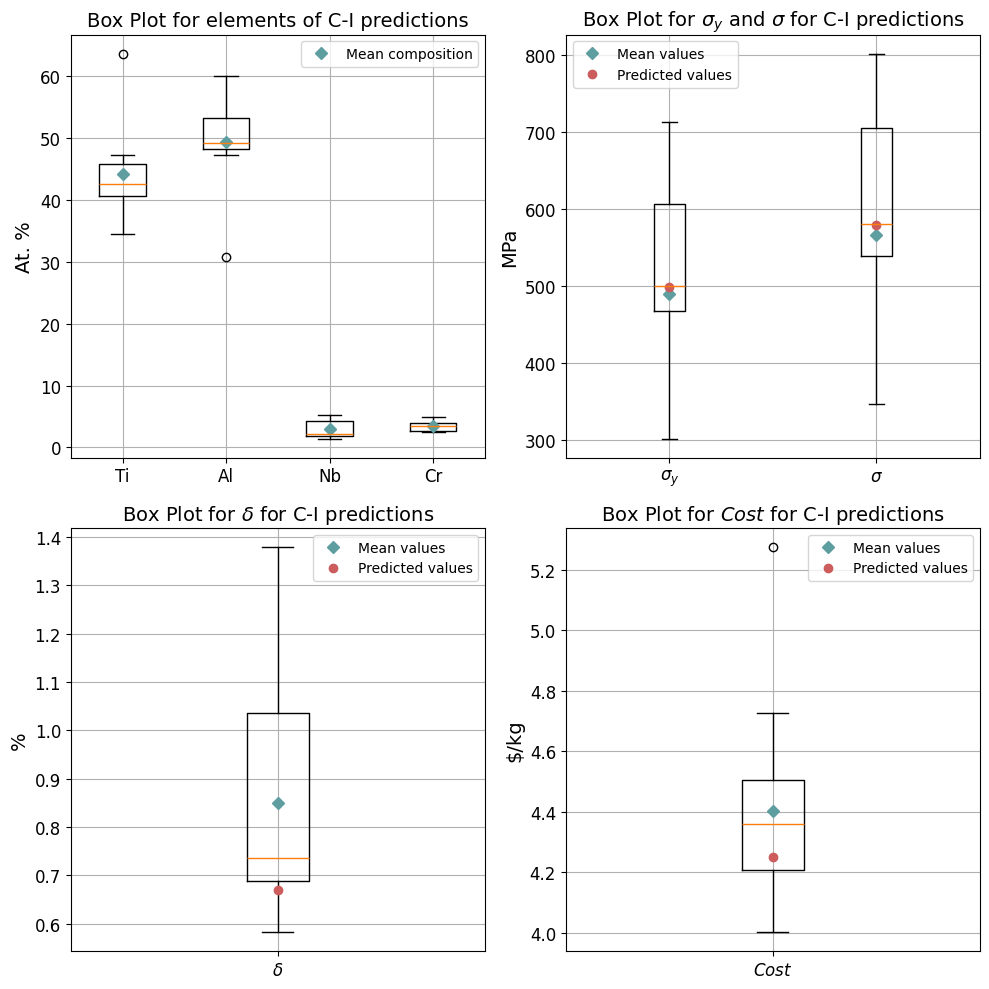

In [7]:
# Create subplots: 1 rows, 4 column
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# First plot: Composition
cols_to_plot = ["Ti", "Al", "Nb", "Cr"]
axs[0][0].boxplot(comp1[cols_to_plot])
axs[0][0].set_title("Box Plot for elements of C-I predictions", fontsize=14)
axs[0][0].set_ylabel("At. %", fontsize=14)
# Define the x positions corresponding to each boxplot and label them with element names
x_positions = range(1, len(cols_to_plot) + 1)
axs[0][0].set_xticks(ticks=x_positions, labels=cols_to_plot)
# Overlay the mean values as diamond markers.
axs[0][0].plot(x_positions, comp1_mean[cols_to_plot], marker='D', color='cadetblue', linestyle='None', label='Mean composition')
axs[0][0].tick_params(axis='x', labelsize=12)
axs[0][0].tick_params(axis='y', labelsize=12)
axs[0][0].grid(True)
axs[0][0].legend(fontsize=10)

# Second plot: YS and TS
axs[0][1].boxplot(10**prop1[["logYS", "logTS"]])
axs[0][1].set_title(r"Box Plot for $\sigma_y$ and $\sigma$ for C-I predictions", fontsize=14)
axs[0][1].set_ylabel("MPa", fontsize=14)
x_positions = range(1, len(["YS", "TS"]) + 1)
axs[0][1].set_xticks(ticks=x_positions, labels=[r"$\sigma_y$", r"$\sigma$"])
# Extract mean values for YS and TS
mean_values = [10**prop1_mean["logYS"], 10**prop1_mean["logTS"]]
axs[0][1].plot(x_positions, mean_values, marker='D', color='cadetblue', linestyle='None', label='Mean values')
# Extract predicted values for YS and TS
predicted_values = [prop1_pred["YS"], prop1_pred["TS"]]
axs[0][1].plot(x_positions, predicted_values, marker='o', color='indianred', linestyle='None', label='Predicted values')
axs[0][1].tick_params(axis='x', labelsize=12)
axs[0][1].tick_params(axis='y', labelsize=12)
axs[0][1].grid(True)
axs[0][1].legend(fontsize=10)

# Third plot: El
axs[1][0].boxplot(10**prop1[["logEl"]])
axs[1][0].set_title(r"Box Plot for $\delta$ for C-I predictions", fontsize=14)
axs[1][0].set_ylabel("%", fontsize=14)
x_positions = range(1, len(["El"]) + 1)
axs[1][0].set_xticks(ticks=x_positions, labels=[r"$\delta$"])
# Extract mean values for El
axs[1][0].plot(x_positions, 10**prop1_mean["logEl"], marker='D', color='cadetblue', linestyle='None', label='Mean values')
# Extract predicted values for El
axs[1][0].plot(x_positions, prop1_pred["El"], marker='o', color='indianred', linestyle='None', label='Predicted values')
axs[1][0].tick_params(axis='x', labelsize=12)
axs[1][0].tick_params(axis='y', labelsize=12)
axs[1][0].grid(True)
axs[1][0].legend(fontsize=10)

# Fourth plot: Cost
axs[1][1].boxplot(10**prop1[["logCost"]])
axs[1][1].set_title("Box Plot for $Cost$ for C-I predictions", fontsize=14)
axs[1][1].set_ylabel("$/kg", fontsize=14)
x_positions = range(1, len(["Cost"]) + 1)
axs[1][1].set_xticks(ticks=x_positions, labels=[r"$Cost$"])
# Extract mean values for El
axs[1][1].plot(x_positions, 10**prop1_mean["logCost"], marker='D', color='cadetblue', linestyle='None', label='Mean values')
# Extract predicted values for El
axs[1][1].plot(x_positions, prop1_pred["Cost"], marker='o', color='indianred', linestyle='None', label='Predicted values')
axs[1][1].tick_params(axis='x', labelsize=12)
axs[1][1].tick_params(axis='y', labelsize=12)
axs[1][1].grid(True)
axs[1][1].legend(fontsize=10)

plt.tight_layout()
plt.show()

In [8]:
fig.savefig('Plots/Box Plot Predictions C-I.jpg')

# C-II predictions

In [ ]:
comp2 = pd.read_excel('MPR_RF_BO_Target-RT_TiAl2Cr2Nb_wCostmod-2_top10.xlsx')
comp2 = comp2.iloc[:10, 1:6]
comp2

,Ti,Al,Mn,Nb,Cr
0,63.67,30.86,0.0,2.14,3.34
1,44.37,48.12,0.0,4.81,2.70
2,37.42,56.13,0.0,1.73,4.72
3,55.22,35.14,0.0,4.02,5.63
4,47.90,45.54,0.0,2.91,3.66
5,37.84,53.42,0.0,5.34,3.40
6,40.56,54.67,0.0,1.98,2.79
7,47.71,47.70,0.0,1.41,3.19
8,38.36,53.19,0.0,3.13,5.32
9,47.28,47.28,0.0,2.08,3.35


In [10]:
comp2_mean = comp2.mean()
comp2_mean

Ti    46.033
Al    47.205
Mn     0.000
Nb     2.955
Cr     3.810
dtype: float64

In [ ]:
prop2 = pd.read_excel('MPR_RF_BO_Target-RT_TiAl2Cr2Nb_wCostmod-2_top10.xlsx')
prop2 = prop2.iloc[:10, 22:26]
prop2

,logYS,logTS,logEl,logCost
0,2.853082,2.903978,0.027013,0.722228
1,2.783033,2.848887,-0.137653,0.648469
2,2.696562,2.761375,-0.167157,0.627099
3,2.850750,2.898467,-0.012814,0.713631
4,2.728436,2.791117,0.049293,0.650099
5,2.786175,2.849362,-0.134061,0.654337
6,2.697508,2.762200,-0.178479,0.630372
7,2.480417,2.540645,0.139358,0.602309
8,2.698689,2.763435,-0.167984,0.631303
9,2.673629,2.743979,-0.046944,0.672412


In [12]:
prop2_mean = prop2.mean()
prop2_mean

logYS      2.724828
logTS      2.786345
logEl     -0.062943
logCost    0.655226
dtype: float64

In [ ]:
prop2_pred = pd.read_excel('MPR_RF_BO_Target-RT_TiAl2Cr2Nb_wCostmod-2_top10_Properties.xlsx')
prop2_pred = prop2_pred.iloc[:,1:]
prop2_pred

,YS,TS,El,Cost
0,490.68,582.31,1.01,4.86


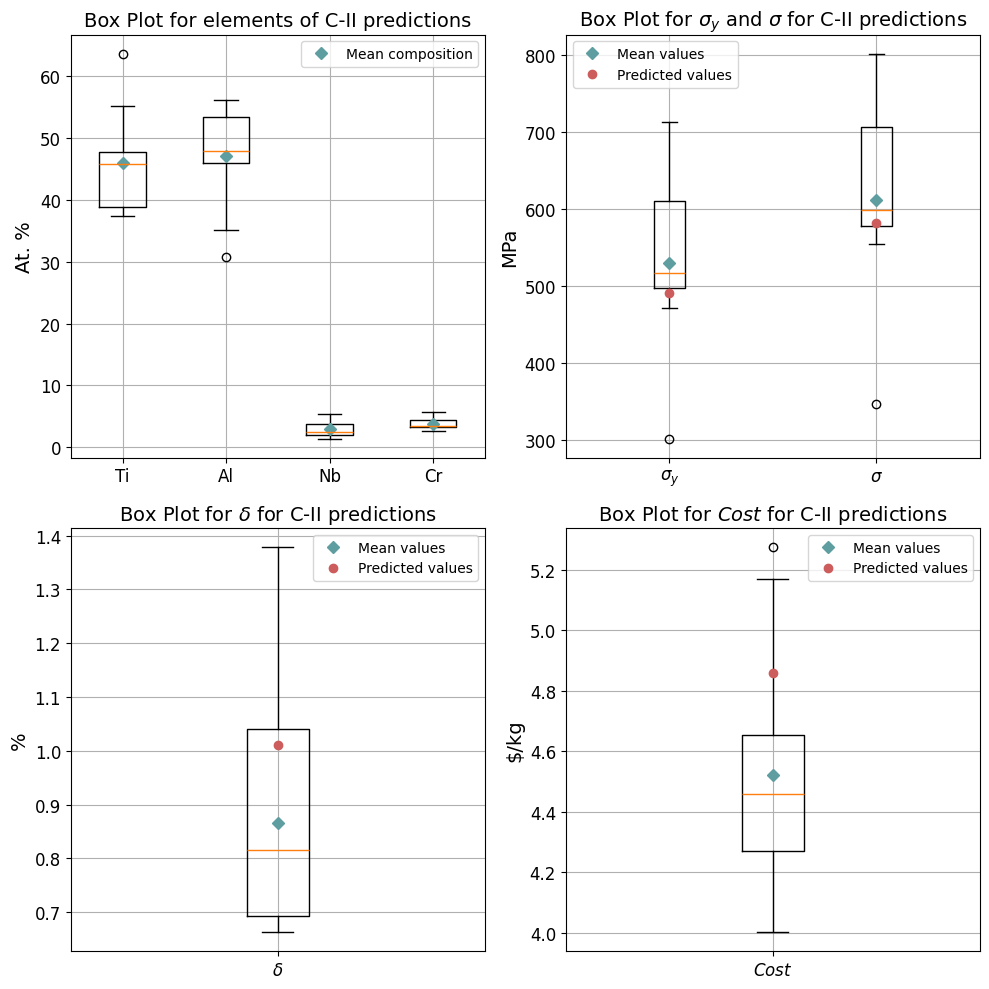

In [14]:
# Create subplots: 1 rows, 4 column
fig, axs = plt.subplots(2, 2, figsize=(10,10))

# First plot: Composition
cols_to_plot = ["Ti", "Al", "Nb", "Cr"]
axs[0][0].boxplot(comp2[cols_to_plot])
axs[0][0].set_title("Box Plot for elements of C-II predictions", fontsize=14)
axs[0][0].set_ylabel("At. %", fontsize=14)
# Define the x positions corresponding to each boxplot and label them with element names
x_positions = range(1, len(cols_to_plot) + 1)
axs[0][0].set_xticks(ticks=x_positions, labels=cols_to_plot)
# Overlay the mean values as diamond markers.
axs[0][0].plot(x_positions, comp2_mean[cols_to_plot], marker='D', color='cadetblue', linestyle='None', label='Mean composition')
axs[0][0].tick_params(axis='x', labelsize=12)
axs[0][0].tick_params(axis='y', labelsize=12)
axs[0][0].grid(True)
axs[0][0].legend(fontsize=10)

# Second plot: YS and TS
axs[0][1].boxplot(10**prop2[["logYS", "logTS"]])
axs[0][1].set_title(r"Box Plot for $\sigma_y$ and $\sigma$ for C-II predictions", fontsize=14)
axs[0][1].set_ylabel("MPa", fontsize=14)
x_positions = range(1, len(["YS", "TS"]) + 1)
axs[0][1].set_xticks(ticks=x_positions, labels=[r"$\sigma_y$", r"$\sigma$"])
# Extract mean values for YS and TS
mean_values = [10**prop2_mean["logYS"], 10**prop2_mean["logTS"]]
axs[0][1].plot(x_positions, mean_values, marker='D', color='cadetblue', linestyle='None', label='Mean values')
# Extract predicted values for YS and TS
predicted_values = [prop2_pred["YS"], prop2_pred["TS"]]
axs[0][1].plot(x_positions, predicted_values, marker='o', color='indianred', linestyle='None', label='Predicted values')
axs[0][1].tick_params(axis='x', labelsize=12)
axs[0][1].tick_params(axis='y', labelsize=12)
axs[0][1].grid(True)
axs[0][1].legend(fontsize=10)

# Third plot: El
axs[1][0].boxplot(10**prop2[["logEl"]])
axs[1][0].set_title(r"Box Plot for $\delta$ for C-II predictions", fontsize=14)
axs[1][0].set_ylabel("%", fontsize=14)
x_positions = range(1, len(["El"]) + 1)
axs[1][0].set_xticks(ticks=x_positions, labels=[r"$\delta$"])
# Extract mean values for El
axs[1][0].plot(x_positions, 10**prop2_mean["logEl"], marker='D', color='cadetblue', linestyle='None', label='Mean values')
# Extract predicted values for El
axs[1][0].plot(x_positions, prop2_pred["El"], marker='o', color='indianred', linestyle='None', label='Predicted values')
axs[1][0].tick_params(axis='x', labelsize=12)
axs[1][0].tick_params(axis='y', labelsize=12)
axs[1][0].grid(True)
axs[1][0].legend(fontsize=10)

# Fourth plot: Cost
axs[1][1].boxplot(10**prop2[["logCost"]])
axs[1][1].set_title("Box Plot for $Cost$ for C-II predictions", fontsize=14)
axs[1][1].set_ylabel("$/kg", fontsize=14)
x_positions = range(1, len(["Cost"]) + 1)
axs[1][1].set_xticks(ticks=x_positions, labels=[r"$Cost$"])
# Extract mean values for El
axs[1][1].plot(x_positions, 10**prop2_mean["logCost"], marker='D', color='cadetblue', linestyle='None', label='Mean values')
# Extract predicted values for El
axs[1][1].plot(x_positions, prop2_pred["Cost"], marker='o', color='indianred', linestyle='None', label='Predicted values')
axs[1][1].tick_params(axis='x', labelsize=12)
axs[1][1].tick_params(axis='y', labelsize=12)
axs[1][1].grid(True)
axs[1][1].legend(fontsize=10)

plt.tight_layout()
plt.show()

In [15]:
fig.savefig('Plots/Box Plot Predictions C-II.jpg')